In [30]:
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
ds_supervisor = pd.read_csv('./csvfiles/직무능력평가.csv')
x = ds_supervisor.drop("EVAL", axis = 1)
y = ds_supervisor['EVAL']
x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


In [12]:
x.corr()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000000,0.558288,0.596736,0.669197,0.187714,0.224580
PRIVILEGE,0.558288,1.000000,0.493331,0.445478,0.147233,0.343293
CHANCE,0.596736,0.493331,1.000000,0.640314,0.115965,0.531620
ADVANCE,0.669197,0.445478,0.640314,1.000000,0.376883,0.574186
CRITISM,0.187714,0.147233,0.115965,0.376883,1.000000,0.283343
PROMOTION,0.224580,0.343293,0.531620,0.574186,0.283343,1.000000


In [18]:
current_palette = sns.color_palette()

<Figure size 432x432 with 0 Axes>

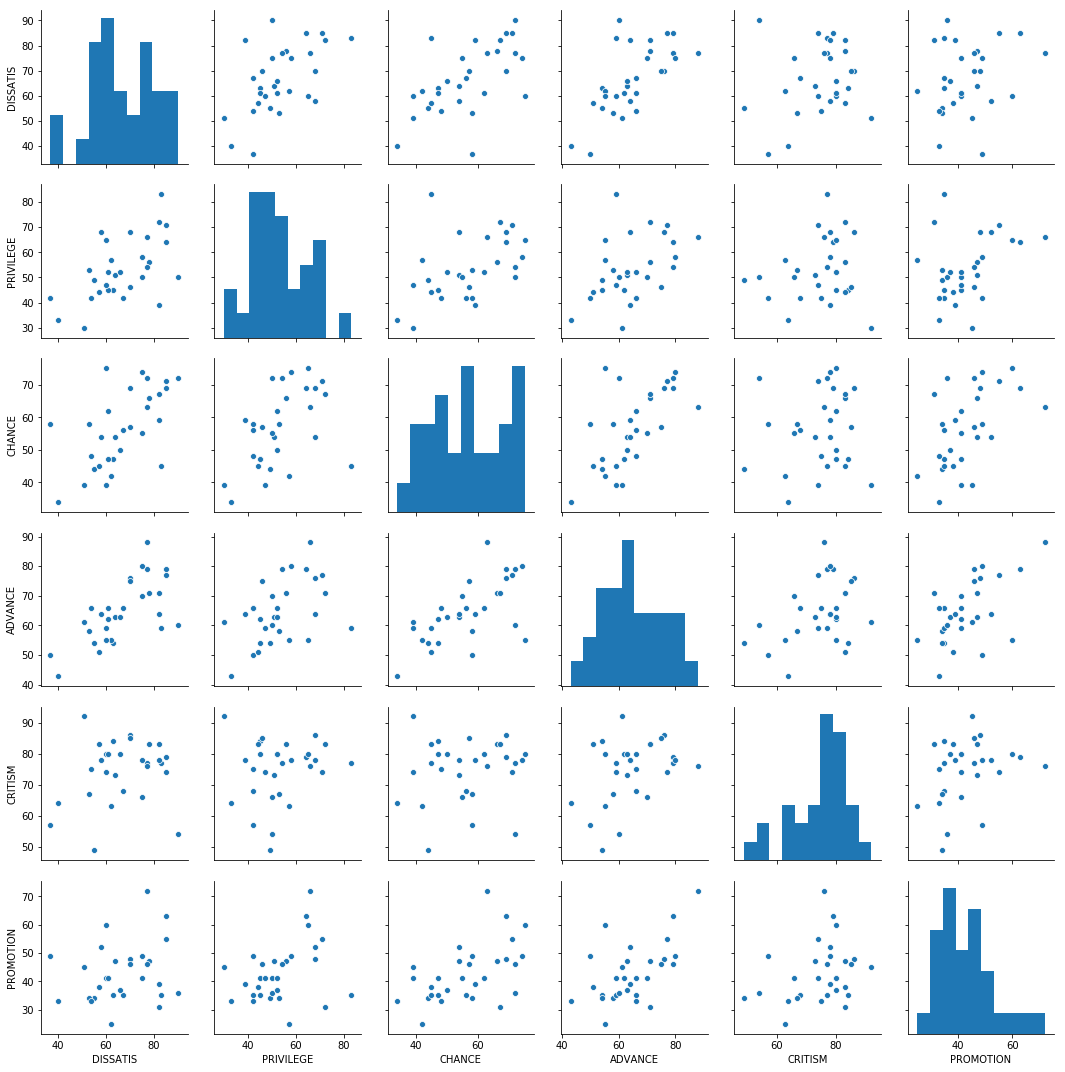

In [22]:
plt.figure(figsize=(6,6))
sns.pairplot(x, palette=current_palette)

In [26]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
print("Scaled data :\n {}".format(x[:5].round(3)))
print("Shape :\n {}".format(x_scale.shape))

Scaled data :
    DISSATIS  PRIVILEGE  CHANCE  ADVANCE  CRITISM  PROMOTION
0        51         30      39       61       92         45
1        64         51      54       63       73         47
2        70         68      69       76       86         48
3        63         45      47       54       84         35
4        78         56      66       71       83         47
Shape :
 (30, 6)


In [28]:
pca = PCA(n_components=6)

x_pca = pca.fit_transform(x_scale)
print("PCA Data :\n {}".format(x_pca[:5]))
print("Shape :\n {}".format(x_pca.shape))
ds_x_pca = pd.DataFrame(x_pca, columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6",])

PCA Data :
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape :
 (30, 6)


##### 고유값 확인

In [31]:
ds_pca = pd.DataFrame()
# 주성분 분석 모델의 주성분 번호, Eigenvalue, Eigenvalue ratio 등을 데이터 프레임의 형태로 저장
ds_pca["Prin"] = [i for i in range(1,7)]
ds_pca["EigenValues"] = pca.explained_variance_ 
ds_pca["EigenValueRatio"] = pca.explained_variance_ratio_
ds_pca["CumsumEigenValueratio"] = np.cumsum(pca.explained_variance_ratio_)
ds_pca.round(3)

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueratio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


In [34]:
ds_feature = pd.DataFrame({"Feature" : x.columns})
# 주성분 Prin 1~6까지의 고유벡터 저장
ds_eigenvectors = pd.concat([ds_feature,pd.DataFrame(pca.components_, columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis = 1)
ds_eigenvectors

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,-0.439375,-0.394711,-0.461401,-0.492658,-0.224813,-0.380801
1,PRIVILEGE,0.312642,0.308751,0.217087,-0.115532,-0.802247,-0.320706
2,CHANCE,-0.445167,-0.217414,0.271981,-0.005605,-0.457246,0.686643
3,ADVANCE,-0.316019,0.814847,-0.224796,-0.365108,0.099947,0.205742
4,CRITISM,0.191521,0.037686,-0.775648,0.460364,-0.288875,0.254728
5,PROMOTION,0.611949,-0.190294,-0.117671,-0.631404,0.057847,0.416465


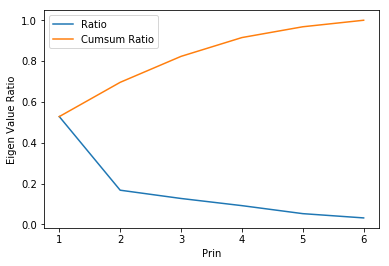

In [37]:
plt.plot(ds_pca["Prin"], ds_pca["EigenValueRatio"], label = "Ratio")
# 누적된 고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"], ds_pca["CumsumEigenValueratio"], label = "Cumsum Ratio")

plt.ylabel("Eigen Value Ratio")
plt.xlabel("Prin")
plt.legend(loc="best")

#### -> EigenValue 기준 2개의 주성분으로 약 70%를 설명 가능

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,0.0,0.0,-0.0
Prin2,0.0,1.0,-0.0,0.0,0.0,0.0
Prin3,-0.0,-0.0,1.0,0.0,-0.0,-0.0
Prin4,0.0,0.0,0.0,1.0,0.0,-0.0
Prin5,0.0,0.0,-0.0,0.0,1.0,0.0
Prin6,-0.0,0.0,-0.0,-0.0,0.0,1.0


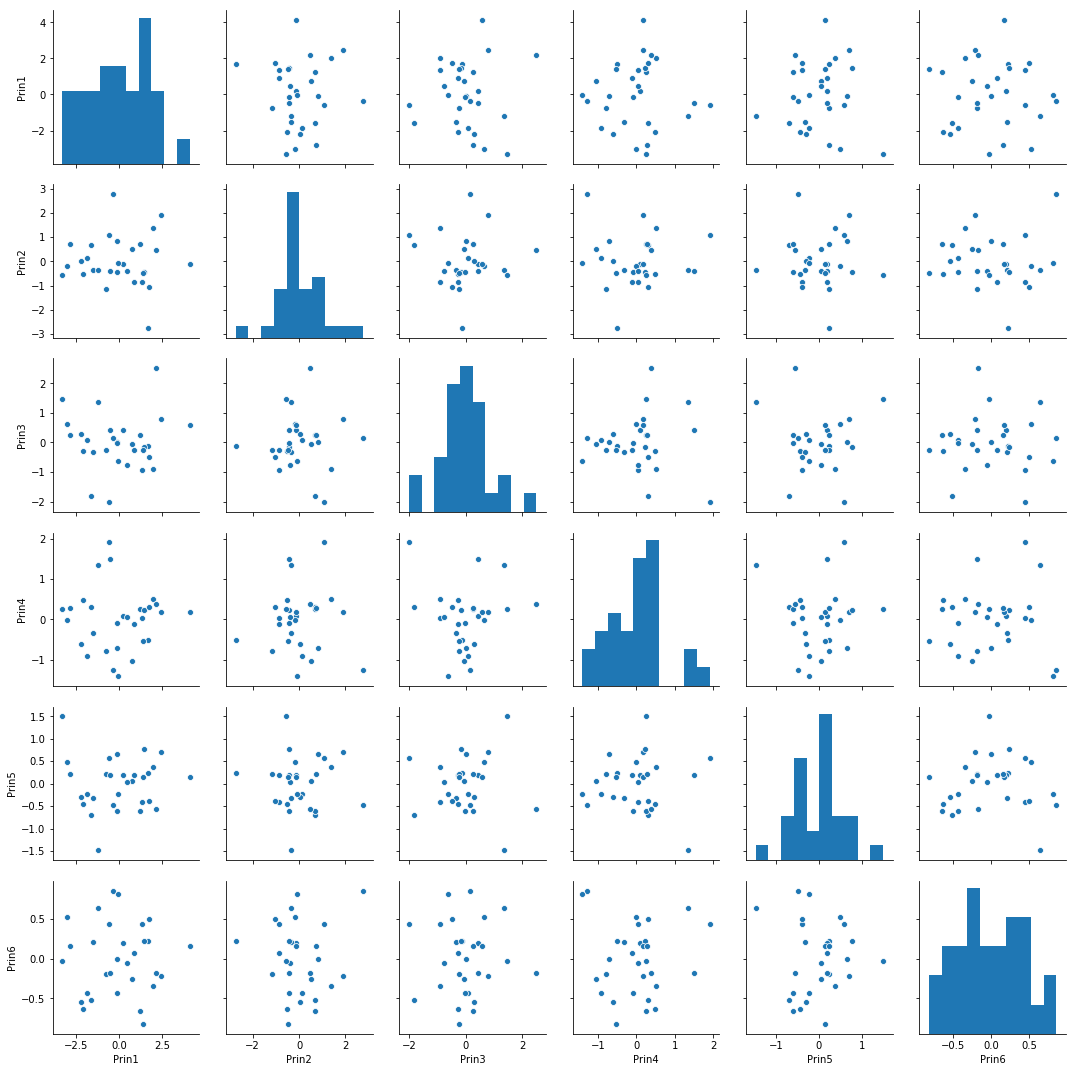

In [38]:
sns.pairplot(ds_x_pca)

#상관계수
ds_x_pca.corr().round(3)

-> 주성분 간 상관관계 0

### 주성분 회귀분석 실행

In [40]:
# 회귀분석 패키지 불러오기
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Scree plot을 이용해 선택한 주성분
x_var = ["Prin1", "Prin2"]

ds_x_pca_const = sm.add_constant(ds_x_pca[x_var])

X_train, X_test, y_train, y_test = train_test_split(ds_x_pca_const, y,
                                                   test_size=0.3, random_state=2222)

In [41]:
reg_model = sm.OLS(y_train, X_train)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     19.53
Date:                Wed, 13 Feb 2019   Prob (F-statistic):           3.09e-05
Time:                        10:27:59   Log-Likelihood:                -71.658
No. Observations:                  21   AIC:                             149.3
Df Residuals:                      18   BIC:                             152.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.5550      1.744     37.022      0.0

1. No. Observation(분석 자료 수) : 22
   DF Residuals(잔차 자유도) : 18
   DF Model(모델 자유도) : 2
2. ANOVA 분석결과    
-> p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
3. 설명력 : 0.685    
-> 회귀모델로 EVAL의 변동을 68.5% 설명
4. 회귀계수 검정    
-> 절편의 p값이 유의수준 0.05보다 작으므로 계수로서 유의(절편은 유의하지 않더라도 모델에 포함)    
-> Prin1이 유의수준 0.05보다 작으므로 계수로서 유의    
-> Prin2의 p값이 유의수준 0.10보다 작으므로 계수로서 유의(0.05 기준으로는 유의하지 않음)    
